# Proyek Analisis Data: Air Quality Dataset
- **Nama        :** Gina Melinia
- **Email       :** b25b9d013@student.devacademy.id
- **ID Dicoding :** ginamelinia
- **Tema Analisis :** Analisis Kualitas Udara Beijing (2013–2017): Evaluasi Dampak CAAP dan Tantangan Diagnostik

## Menentukan Pertanyaan Bisnis

Proyek ini bertujuan untuk menganalisis perubahan kualitas udara di Beijing selama periode 2013–2017, bertepatan dengan pelaksanaan **Beijing Clean Air Action Plan (CAAP)** yang ditetapkan oleh **Beijing Municipal People's Government**. Kebijakan ini berfokus pada pengendalian tiga sumber utama: **Pembakaran Batubara**, **Emisi Kendaraan**, dan **Debu Industri**.

Berikut adalah pertanyaan bisnis yang akan dijawab melalui analisis yang akan dilakukan:
1. Bagaimana tren konsentrasi polutan utama (PM2.5, SO2, dan NO2) di Beijing selama 2013–2017?
2. Apakah terlihat perbedaan signifikan dalam konsentrasi polutan antara periode pra-September 2013 vs. pasca-September 2013?
3. Bagaimana hubungan antara NO2 dan O3 selama periode *Summer* tersebut, dan apakah terlihat indikasi **Ozone Paradox** (penurunan NO2 disertai kenaikan O3)?
4. Bagaimana pengaruh dinamika atmosfer (khususnya kecepatan dan arah angin) terhadap tingkat polusi PM2.5 di Beijing?

## Import Semua Packages/Library yang Digunakan

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

## Data Wrangling

### Gathering Data

Dataset yang digunakan pada proyek analisis ini adalah Air Quality Dataset yang merupakan dataset polutan dan meteorologi yang dikumpulkan dari 12 staisun pemantauan udara di Beijing, China. Dataset ini terdiri dari 12 file .csv dengan kolom-kolom yang sama. Periode waktu yang dicakup adalah dari 1 Maret 2013 hingga 28 Februari 2017.

In [44]:
folder_path = './data/' 
all_files = sorted(glob.glob(os.path.join(folder_path, "PRSA_Data_*.csv")))

df_list = []

for filename in all_files:
    try:
        df = pd.read_csv(filename)
        df_list.append(df)
    except Exception as e:
        print(f"❌ Gagal memuat file: {os.path.basename(filename)}. Error: {e}")

df_full = pd.concat(df_list, ignore_index=True)

print(f"Data berhasil digabung!")
print(f"Total file terbaca: {len(all_files)}")
print(f"Total baris data: {len(df_full)}")
print(f"Total kolom data: {len(df_full.columns)}")

Data berhasil digabung!
Total file terbaca: 12
Total baris data: 420768
Total kolom data: 18


In [45]:
df_full.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Pada tahap ini, data csv dari 12 stasiun pemantauan udara telah berhasil digabungkan.
- Total baris data setelah digabungkan adalah **420768** dengan total kolom sebanyak **18**

### Assessing Data

#### Pemeriksaan Struktur dan Tipe Data

In [46]:
# Jumlah baris (observasi) dan kolom (variabel)
print("\nShape Data (baris, kolom):", df_full.shape)


Shape Data (baris, kolom): (420768, 18)


In [47]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


**Insight**:
- Data waktu (year, month, day, hour) dan station lengkap, sehingga tidak perlu ada penanganan missing value pada kolom tersebut.
- Data waktu sudah bertipe int64, data ini ideal untuk langsung digabungkan menjadi satu kolom *datetime* tanpa perlu konversi tipe data awal. Ini mempermudah langkah konversi waktu.
- Data polutan dan meteorologi sebagian besar bertipe float64, tipe ini sudah cocok untuk pengukuran kontinu.

#### Pemeriksaan Konsistensi Data Waktu (Range)

In [48]:
# Memastikan rentang data 2013-2017
print("\nRentang Tahun (year):", df_full['year'].unique())
print("Jumlah Unik Bulan (month):", df_full['month'].nunique())
print("Jumlah Unik Jam (hour):", df_full['hour'].nunique())


Rentang Tahun (year): [2013 2014 2015 2016 2017]
Jumlah Unik Bulan (month): 12
Jumlah Unik Jam (hour): 24


In [49]:
# Menghitung jumlah record (baris) per tahun
annual_record_count = df_full['year'].value_counts().sort_index()

print("Jumlah Total Record (Baris) Per Tahun:")
print(annual_record_count)

Jumlah Total Record (Baris) Per Tahun:
year
2013     88128
2014    105120
2015    105120
2016    105408
2017     16992
Name: count, dtype: int64


**Insight**:
- Rentang waktu sesuai, tidak ada tahun di luar rentang 2013-2017
- Jumlah bulan dan jam unik, lengkap dan sesuai
- Tahun 2016 memiliki jumlah baris yang lebih besar karena merupakan tahun kabisat.

#### Pemeriksaan Konsistensi Nilai Kategorikal

In [50]:
# Kolom Stasiun (Verifikasi 12 stasiun untuk Feature Engineering Spasial)
print("\nJumlah Stasiun Unik (station):", df_full['station'].nunique())
print("Daftar Stasiun:", df_full['station'].unique())


Jumlah Stasiun Unik (station): 12
Daftar Stasiun: ['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong']


In [51]:
# Kolom Arah Angin (wd)
print("Nilai unik dan frekuensi untuk kolom 'wd' (Arah Angin):")
print(df_full['wd'].value_counts())

print(f"\nTotal jenis arah angin yang ditemukan: {df_full['wd'].nunique()}")

Nilai unik dan frekuensi untuk kolom 'wd' (Arah Angin):
wd
NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64

Total jenis arah angin yang ditemukan: 16


**Insight**:
- Jumlah stasiun sudah unik dan lengkap, terdiri dari 12 stasiun pemantauan udara.
- Jumlah arah angin juga sudah lengkap, yaitu 16 arah angin.

#### Pemeriksaan Konsistensi Nilai Numerikal

In [52]:
# Semua polutan dan variabel meteorologi numerik
cols_numeric_check = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 
                      'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Gabungkan dan tampilkan deskripsi
df_full[cols_numeric_check].describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,412029.0,79.793428,80.822391,2.0000,20.0,55.0,111.0,999.0
PM10,414319.0,104.602618,91.772426,2.0000,36.0,82.0,145.0,999.0
SO2,411747.0,15.830835,21.650603,0.2856,3.0,7.0,20.0,500.0
NO2,408652.0,50.638586,35.127912,1.0265,23.0,43.0,71.0,290.0
CO,400067.0,1230.766454,1160.182716,100.0000,500.0,900.0,1500.0,10000.0
O3,407491.0,57.372271,56.661607,0.2142,11.0,45.0,82.0,1071.0
TEMP,420370.0,13.538976,11.436139,-19.9000,3.1,14.5,23.3,41.6
PRES,420375.0,1010.746982,10.474055,982.4000,1002.3,1010.4,1019.0,1042.8
DEWP,420365.0,2.490822,13.793847,-43.4000,-8.9,3.1,15.1,29.1
RAIN,420378.0,0.064476,0.821004,0.0000,0.0,0.0,0.0,72.5


**Insight:**
- Nilai maximum untuk PM2.5 adalah 999.0 yang mana tergolong outlier ekstrem. Walaupun mustahil, hal ini sering digunakan sebagai nilai ambang batas sensor (capped value).
- Nilai maximum untuk CO adalah 10000 ppm yang tergolong sangat tinggi (Hazardous). Akan tetapi, hal ini sering menjadi capped value untuk sensor.
- Data meteorologi WSPM memiliki range yang logis untuk membangun feature **stagnasi udara**.

**Key takeaway:**
Data bersih dari error sensor yang tergolong mustahil. Nilai ekstrem pada PM2.5 akan dipertahankan untuk mewakili hari-hari krisis polusi.

#### Pemeriksaan Missing Value

In [53]:
# Hitung jumlah dan persentase NA menggunakan isna()
missing_info = pd.DataFrame({
    'Missing Count': df_full.isna().sum(),
    'Missing Percentage': (df_full.isna().sum() / len(df_full)) * 100
})

# Filter dan tampilkan hanya kolom yang memiliki NA, diurutkan dari yang terbanyak
missing_data_summary = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("Ringkasan Kolom dengan Nilai Hilang:")
missing_data_summary

Ringkasan Kolom dengan Nilai Hilang:


,Missing Count,Missing Percentage
CO,20701,4.919813
O3,13277,3.155421
NO2,12116,2.879497
SO2,9021,2.143937
PM2.5,8739,2.076916
PM10,6449,1.532674
wd,1822,0.433018
DEWP,403,0.095777
TEMP,398,0.094589
PRES,393,0.093401


**Insight**:
- Persentase missing value tertinggi adalah CO pada 4.92% (di bawah 5%).
- Persentase missing value pada polutan inti (PM2.5 dan SO2) tergolong rendah (~2%).
- Karena tingkat missing value yang relatif rendah, Interpolasi Linier per stasiun akan digunakan untuk cleaning sesuai dengan rencana awal.
- Kolom wd memiliki persentase ~0.43% missing value, akan tetapi tidak akan dilibatkan dalam penanganan menggunakan Interpolasi Linier maupun menggunakan imputasi untuk menjaga integritas data untuk tahap Wind Rose Analysis. Melakukan imputasi terhadap wd akan secara artifisial meningkatkan frekuensi arah angin tersebut. Hal ini dapat mendistorsi kesimpulan Wind Rose, sehingga mengurangi validitas analisis kausalitas meteorologi


#### Pemeriksaan Data Duplikat

In [54]:
# Kolom kunci: Waktu (gabungan kolom waktu) dan Stasiun
duplicate_rows = df_full.duplicated(subset=['year', 'month', 'day', 'hour', 'station']).sum()

print(f"Total baris yang terduplikasi: {duplicate_rows}")
if duplicate_rows > 0:
    print("⚠️ Ditemukan baris duplikat. Harus dihapus pada tahap Cleaning.")

Total baris yang terduplikasi: 0


### Cleaning Data

#### Menghapus kolom index lama dan baris duplikat

In [55]:
# Menghapus kolom 'No' yang merupakan indeks lama dan tidak relevan
df_full = df_full.drop('No', axis=1)

print(f"Kolom 'No' Dihapus.")

df_full.head()

Kolom 'No' Dihapus.


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [56]:
# Menghapus baris duplikat berdasarkan kolom kunci (sebagai formalitas, karena duplikat sudah dihitung sebelumnya = 0)
initial_rows = len(df_full)
df_full.drop_duplicates(subset=['year', 'month', 'day', 'hour', 'station'], 
                        keep='first', 
                        inplace=True)
duplicates_removed = initial_rows - len(df_full)

print(f"Duplikat Dihapus: {duplicates_removed} baris.")

Duplikat Dihapus: 0 baris.


#### Konversi kolom waktu (year, month, day, hour) ke 'datetime'

In [57]:
# Langkah ini krusial untuk time-series analysis
df_full['datetime'] = pd.to_datetime(df_full[['year', 'month', 'day', 'hour']])

# Menghapus kolom waktu lama (year, month, day, hour)
df_full = df_full.drop(['year', 'month', 'day', 'hour'], axis=1)

# Memindahkan kolom datetime ke posisi pertama
cols = df_full.columns.tolist()
cols.insert(0, cols.pop(cols.index('datetime')))
df_full = df_full[cols]

print("Kolom Waktu Dikonversi ke 'datetime' dan kolom lama Dihapus.")

df_full.head()

Kolom Waktu Dikonversi ke 'datetime' dan kolom lama Dihapus.


,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


#### Menangani Missing Value (Interpolasi Linier per Stasiun)

In [58]:
# Urutkan berdasarkan stasiun dan datetime untuk memastikan interpolasi kronologis
df_full.sort_values(by=['station', 'datetime'], inplace=True)

# Menyiapkan dataframe 'datetime' sebagai index yang baru
df_full = df_full.set_index('datetime')

# Daftar kolom yang akan diinterpolasi (hanya numerik)
cols_to_interpolate = df_full.columns.drop(['station', 'wd'])

# Interpolasi Linier dengan groupby + transform untukk memastikan NA di satu stasiun hanya diisi oleh data stasiun itu sendiri
df_full[cols_to_interpolate] = df_full.groupby('station')[cols_to_interpolate].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

In [59]:
# Cek apakah semua NA pada kolom yang diinterpolasi sudah hilang
na_check = df_full[cols_to_interpolate].isnull().sum().sum()
print(f"Missing Value Polutan/Meteorologi (Total NA): {na_check}")

# Verifikasi NA wd yang dibiarkan
na_wd_check = df_full['wd'].isnull().sum()
print(f"Verifikasi missing value pada 'wd' (Dibiarkan): {na_wd_check}")

Missing Value Polutan/Meteorologi (Total NA): 0
Verifikasi missing value pada 'wd' (Dibiarkan): 1822


**Insight:**
- Data duplikasi dan kolom index yang lama ('No') sudah diatasi.
- Kolom waktu (year, month, day, hour) berhasil dikonversi menjadi 'datetime', krusial untuk langkah interpolasi linier.
- Missing value (NA) pada setiap kolom polutan/meteorologi telah berhasil diatasi menggunakan interpolasi linier yang dilakukan secara kronologis per stasiun.
- Missign value (NA) pada kolom 'wd' (arah angin) memang sengaja dibiarkan untuk tidak dihapus untuk keperluan Wind Rose Analysis.

#### Feature Engineering

In [60]:
# Definisikan pemetaan stasiun ke Tipe Area (sesuai kesepakatan Urban/Suburban/Rural)
station_mapping = {
    # Rural
    'Dingling': 'Rural',
    'Huairou': 'Rural',
    
    # Suburban
    'Changping': 'Suburban',
    'Shunyi': 'Suburban',
    
    # Urban
    'Aotizhongxin': 'Urban',
    'Dongsi': 'Urban',
    'Gucheng': 'Urban',
    'Guanyuan': 'Urban',
    'Nongzhanguan': 'Urban',
    'Tiantan': 'Urban',
    'Wanliu': 'Urban',
    'Wanshouxigong': 'Urban'
}

# Buat kolom Area_Type baru menggunakan fungsi map()
df_full['Area_Type'] = df_full['station'].map(station_mapping)

# Konfirmasi pengelompokan
print("Distribusi stasiun berdasarkan Area_Type")
print(df_full['Area_Type'].value_counts())
print(f"Total Area Unik: {df_full['Area_Type'].nunique()}")
print(f"Jumlah NA pada Area_Type: {df_full['Area_Type'].isnull().sum()}")

Distribusi stasiun berdasarkan Area_Type
Area_Type
Urban       280512
Suburban     70128
Rural        70128
Name: count, dtype: int64
Total Area Unik: 3
Jumlah NA pada Area_Type: 0


In [61]:
# Ekstrak bulan dari datetime (gunakan kolom 'datetime' jika ada, kalau tidak gunakan index)
if 'datetime' in df_full.columns:
    month_series = df_full['datetime'].dt.month
else:
    if not isinstance(df_full.index, pd.DatetimeIndex):
        try:
            df_full.index = pd.to_datetime(df_full.index)
        except Exception as e:
            raise ValueError("Index is not datetime and 'datetime' column is missing.") from e
    month_series = df_full.index.month

df_full['month'] = month_series

# Mendefinisikan pemetaan musim
def get_season(month):
    """Mengklasifikasikan bulan menjadi 4 musim standar (Hemisphere Utara)."""
    if month in [12, 1, 2]:
        return 'Winter' # Desember, Januari, Februari
    elif month in [3, 4, 5]:
        return 'Spring' # Maret, April, Mei
    elif month in [6, 7, 8]:
        return 'Summer' # Juni, Juli, Agustus (Fokus untuk PB 3)
    else: # 9, 10, 11
        return 'Autumn' # September, Oktober, November

# Membuat kolom 'Season'
df_full['Season'] = df_full['month'].apply(get_season)

# Menghapus kolom 'month' bantu
df_full.drop(columns=['month'], inplace=True)

print("Distribusi Data berdasarkan Season")
print(df_full['Season'].value_counts(dropna=False))

Distribusi Data berdasarkan Season
Season
Spring    105984
Summer    105984
Autumn    104832
Winter    103968
Name: count, dtype: int64


In [62]:
# CAAP dianggap efektif pasca 1 Oktober 2013, untuk menghindari anomali di bulan pengumuman (September 2013).
# Membuat flag Boolean: True jika waktu sebelum 2013-10-01

df_full['Pre_CAAP'] = df_full.index < pd.to_datetime('2013-10-01 00:00:00')

print("\nDistribusi Data Pre CAAP:")

print(df_full['Pre_CAAP'].value_counts(normalize=True))


Distribusi Data Pre CAAP:
Pre_CAAP
False    0.853525
True     0.146475
Name: proportion, dtype: float64


In [63]:
# Kriteria: WSPM (Wind Speed Per Hour) < 3.2 m/s
df_full['Is_Stagnant'] = df_full['WSPM'] < 3.2

In [64]:
# Menghitung proporsi True (Stagnant) vs False (Non-Stagnant)
stagnant_distribution = df_full['Is_Stagnant'].value_counts(normalize=True) * 100

print("Distribusi Kondisi Stagnasi Udara (WSPM < 3.2 m/s):")
print(stagnant_distribution)

Distribusi Kondisi Stagnasi Udara (WSPM < 3.2 m/s):
Is_Stagnant
True     87.959398
False    12.040602
Name: proportion, dtype: float64


**Insight**:
- Fitur 'Area_Type' berhasil dibuat, dengan area urban menjadi area paling dominan untuk letak stasiun yang ada di dataset ini.
- Fitur 'Season' telah dibuat dengan 4 kategori musim (Spring, Summer, Autumn, Winter).
- Fitur 'Pre-CAAP' akan digunakan untuk perbandingan keberhasilan pengendalian polusi sebelum dan sesudah kebijakan CAAP diterapkan.
- Fitur Is_Stagnant telah dibuat dengan kriteria WSPM < 3.2 m/s bernilai True.

In [65]:
df_full.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Area_Type,Season,Pre_CAAP,Is_Stagnant
datetime,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Urban,Spring,True,False
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Urban,Spring,True,False
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Urban,Spring,True,False
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Urban,Spring,True,True
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Urban,Spring,True,True


## Exploratory Data Analysis (EDA)

### Tren Polutan Utama Tahunan

Bagian ini akan menghitung rata-rata konsentrasi tahunan untuk PM2.5, SO2, dan NO2 dari 2013 hingga 2017.

In [66]:
 # Daftar polutan yang akan dianalisis untuk Pertanyaan Bisnis 1
pollutants_pb1 = ['PM2.5', 'SO2', 'NO2']

df_full['year'] = df_full.index.year

df_annual_trend = df_full.groupby(['year'])[pollutants_pb1].mean()

df_full.drop(columns=['year'], inplace=True)

print("DataFrame Rata-rata Polutan Tahunan:")
print(df_annual_trend)

DataFrame Rata-rata Polutan Tahunan:
          PM2.5        SO2        NO2
year                                 
2013  79.768553  19.998777  52.047564
2014  86.183671  21.204405  55.047965
2015  79.306423  12.996102  48.315936
2016  72.078419   9.775876  46.161344
2017  92.407898  18.105815  57.215837


**Insight**:
- Semua polutan mengalami penurunan dari tahun 2014 ke 2016.
- Semua polutan mengalami kenaikan di tahun 2014 dan 2017.

### Evaluasi Pra- vs. Pasca-CAAP

Untuk mengevaluasi dampak **Clean Air Action Plan** (CAAP), data akan dibagi menjadi dua periode berdasarkan implementasi kebijakan 2013–2017:

- Periode Pra-CAAP: Sebelum 1 Oktober 2013

- Periode Pasca-CAAP: Setelah 1 Oktober 2013 - 27 Februari 2017

In [67]:
df_full['year'] = df_full.index.year

# Menghitung Rata-rata Tahunan dan Rata-rata Pra-CAAP
pollutants_caap = ['PM2.5', 'NO2', 'SO2']

df_post_caap_annual = df_full[df_full['Pre_CAAP'] == False].groupby('year')[pollutants_caap].mean()

df_pre_caap_baseline = df_full[df_full['Pre_CAAP'] == True][pollutants_caap].mean().to_frame().T
df_pre_caap_baseline.index = ['Pre_CAAP_Baseline']

df_evaluation = pd.concat([df_pre_caap_baseline, df_post_caap_annual])

# Menghitung Persentase Perubahan terhadap Baseline Pra-CAAP
baseline_values = df_evaluation.loc['Pre_CAAP_Baseline']

# Menghitung perubahan (%) untuk setiap tahun Pasca-CAAP
df_annual_change = (
    (df_post_caap_annual - baseline_values) / baseline_values
) * 100

df_full.drop(columns=['year'], errors='ignore', inplace=True)


print("Rata-rata Polutan Tahunan vs. Baseline Pra-CAAP:")
print(df_evaluation)
print("\nPersentase Perubahan Tahunan (vs. Baseline Pra-CAAP):")
print(df_annual_change.applymap(lambda x: f'{x:+.2f}%'))

Rata-rata Polutan Tahunan vs. Baseline Pra-CAAP:
                       PM2.5        NO2        SO2
Pre_CAAP_Baseline  79.097502  48.702903  17.693207
2013               81.329475  59.827535  25.361733
2014               86.183671  55.047965  21.204405
2015               79.306423  48.315936  12.996102
2016               72.078419  46.161344   9.775876
2017               92.407898  57.215837  18.105815

Persentase Perubahan Tahunan (vs. Baseline Pra-CAAP):
        PM2.5      NO2      SO2
year                           
2013   +2.82%  +22.84%  +43.34%
2014   +8.96%  +13.03%  +19.84%
2015   +0.26%   -0.79%  -26.55%
2016   -8.87%   -5.22%  -44.75%
2017  +16.83%  +17.48%   +2.33%


C:\Users\melin\AppData\Local\Temp\ipykernel_28932\1566588207.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df_annual_change.applymap(lambda x: f'{x:+.2f}%'))


**Insight**:
- Tahun 2016 semua polutan kompak mengalami penurunan dengan SO2 menjadi polutan yang mengalami penurunan yang paling signifikan.

### Dampak Domino Ozon

Bagian ini bertujuan untuk menghitung korelasi tahunan antara O3 dan NO2 di musim panas untuk mencari indikasi *Ozone Paradox* (penurunan NO2 yang disertai potensi kenaikan O3). Korelasi yang sangat negatif dapat mengindikasikan dominasi rezim kimiawi tertentu.

In [68]:
# Memastikan kolom 'year' tersedia
if 'year' not in df_full.columns:
    df_full['year'] = df_full.index.year

# Memfilter data hanya untuk musim panas ('Summer')
df_summer = df_full[df_full['Season'] == 'Summer'].copy()

# Menghitung Korelasi O3 dan NO2 per tahun
ozone_nitro_corr = df_summer.groupby('year')[['O3', 'NO2']].corr().unstack().iloc[:, 1]

ozone_nitro_corr.name = 'O3_NO2_Correlation_Summer'

# Menampilkan hasil korelasi tahunan
print("Korelasi O3 vs. NO2 di Musim Panas (Per Tahun):")
print(ozone_nitro_corr)

Korelasi O3 vs. NO2 di Musim Panas (Per Tahun):
year
2013   -0.344560
2014   -0.502320
2015   -0.335960
2016   -0.363014
Name: O3_NO2_Correlation_Summer, dtype: float64


**Insight**:
- Hasil korelasi pearson antara O3 dan NO2 pada musim panas (Summer) dari 2013 hingga 2016 menunjukkan bahwa semua korelasi bernilai negatif.
- NO2 tidak hanya berfungsi sebagai prekursor ozon tetapi juga sebagai penghancur (scavenger) ozon di siang hari. Oleh karena itu, penurunan konsentrasi NO2 (akibat kebijakan CAAP) akan mengakibatkan penghancuran O3 yang lebih sedikit, yang pada gilirannya dapat menyebabkan kenaikan bersih pada konsentrasi O3.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

*Bagaimana tren konsentrasi polutan utama (PM2.5, SO2, dan NO2) di Beijing selama 2013–2017?*

In [69]:
# Pastikan kolom 'year' tersedia
if 'year' not in df_full.columns:
    df_full['year'] = df_full.index.year

# Hitung Rata-rata Tahunan
pollutants_pb1 = ['PM2.5', 'NO2', 'SO2']
df_viz_pb1 = df_full.groupby('year')[pollutants_pb1].mean().reset_index()

# Hapus kolom 'year' dari df_full
df_full.drop(columns=['year'], errors='ignore', inplace=True)

print("Data Siap untuk Line Plot Tren Tahunan (PB 1):")
print(df_viz_pb1)

Data Siap untuk Line Plot Tren Tahunan (PB 1):
   year      PM2.5        NO2        SO2
0  2013  79.768553  52.047564  19.998777
1  2014  86.183671  55.047965  21.204405
2  2015  79.306423  48.315936  12.996102
3  2016  72.078419  46.161344   9.775876
4  2017  92.407898  57.215837  18.105815


<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
C:\Users\melin\AppData\Local\Temp\ipykernel_28932\2112488251.py:14: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Konsentrasi ($\mu g/m^3$)', fontsize=10)


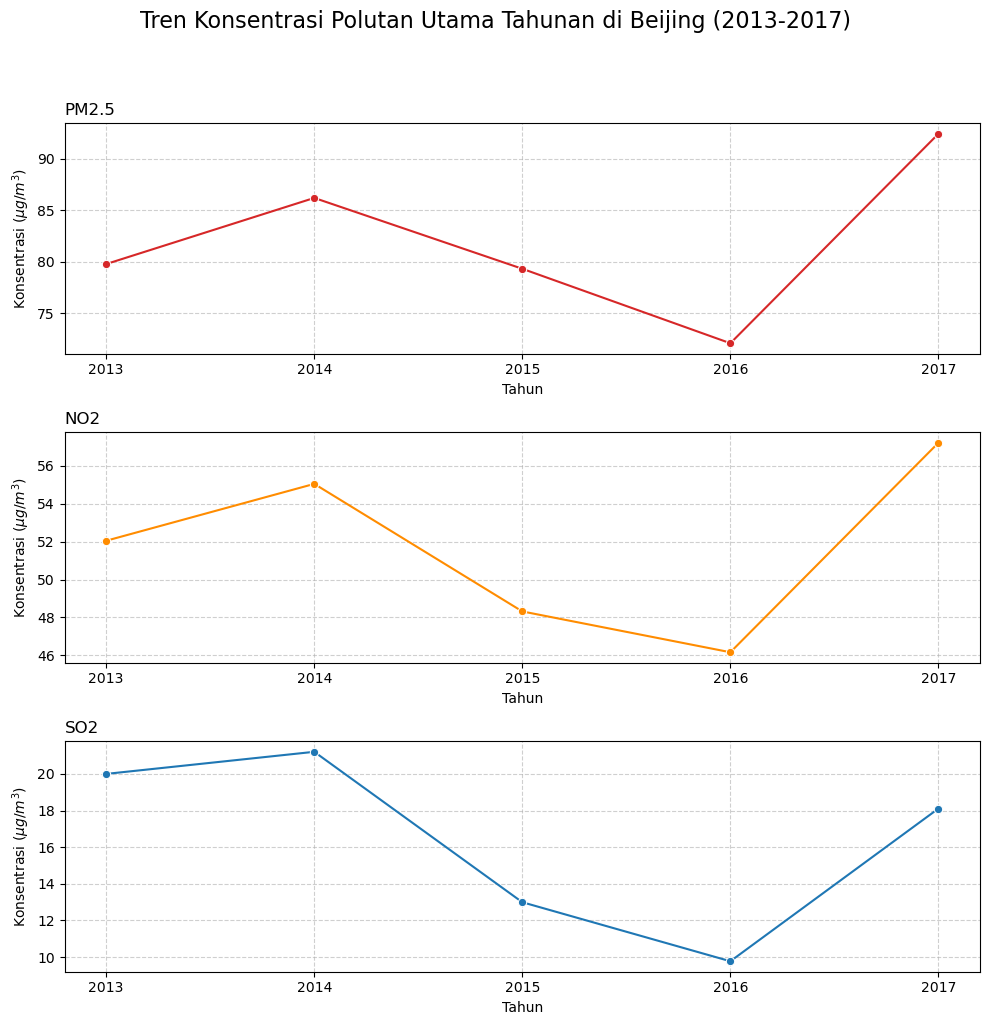

In [70]:
# Visualisasi Pertanyaan Bisnis 1
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10)) # sharex dihapus untuk menghindari ambiguitas
plt.suptitle('Tren Konsentrasi Polutan Utama Tahunan di Beijing (2013-2017)', fontsize=16, y=1.02)
pollutant_colors = {'PM2.5': 'tab:red', 'NO2': 'darkorange', 'SO2': 'tab:blue'}
polutants = ['PM2.5', 'NO2', 'SO2']

for i, pol in enumerate(polutants):
    ax = axes[i]
    
    # Plot data
    sns.lineplot(ax=ax, data=df_viz_pb1, x='year', y=pol, marker='o', 
                 color=pollutant_colors[pol])
    ax.set_title(pol, loc='left', fontsize=12)
    ax.set_ylabel('Konsentrasi ($\mu g/m^3$)', fontsize=10)
    ax.set_xlabel('Tahun', fontsize=10)
    ax.set_xticks(df_viz_pb1['year'])
    
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Semua polutan utama mengalami penurunan dari tahun 2014 ke 2016. Akan tetapi, semua polutan juga mengalami kenaikan yang drastis dari tahun 2016 ke 2017. Kenaikan tersebut perlu ditinjau ulang mengingat data yang digunakan pada tahun 2017 hanyalah dari 1 Januari 2017 - 27 Februari 2017, lebih sedikit jika dibandingkan dengan tahun lainnya. SO2 menjadi polutan utama dengan tren paling mengesankan. Hal ini menunjukkan keberhasilan kebijakan CAAP dalam penekanan penggunaan batu bara.

### Pertanyaan 2:

*Apakah terlihat perbedaan signifikan dalam konsentrasi polutan antara periode pra-September 2013 vs. pasca-September 2013?*

In [71]:
# Mengubah df_annual_change dari format wide ke long untuk plotting Seaborn
df_viz_pb2_long_pct = df_annual_change.reset_index().melt(
    id_vars='year', var_name='Pollutant', value_name='Percentage_Change'
)

# Menghapus tahun 2013 dari plotting karena kita fokus pada dampak Pasca-CAAP
df_viz_pb2_long_pct = df_viz_pb2_long_pct[df_viz_pb2_long_pct['year'] >= 2014].copy()
df_viz_pb2_long_pct['year'] = df_viz_pb2_long_pct['year'].astype(str)

C:\Users\melin\AppData\Local\Temp\ipykernel_28932\2115601633.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\melin\AppData\Local\Temp\ipykernel_28932\2115601633.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\melin\AppData\Local\Temp\ipykernel_28932\2115601633.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


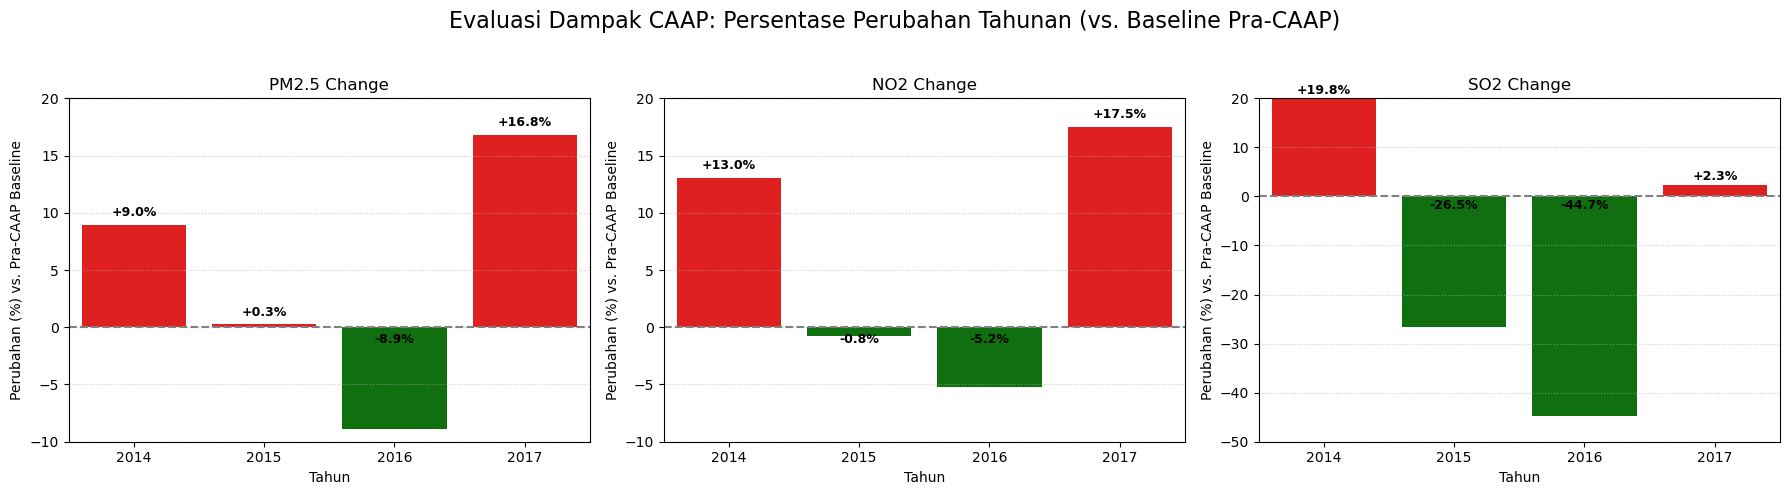

In [72]:
# Visualisasi Pertanyaan Bisnis 2

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=False)
plt.suptitle('Evaluasi Dampak CAAP: Persentase Perubahan Tahunan (vs. Baseline Pra-CAAP)', fontsize=16)

pollutants_caap = ['PM2.5', 'NO2', 'SO2']

for i, pol in enumerate(pollutants_caap):
    ax = axes[i]
    
    df_pol = df_viz_pb2_long_pct[df_viz_pb2_long_pct['Pollutant'] == pol]
    colors = ['r' if p > 0 else 'g' for p in df_pol['Percentage_Change']]

    # Plot Bar Chart
    sns.barplot(
        ax=ax,
        data=df_pol,
        x='year',
        y='Percentage_Change',
        palette=colors,
        legend=False
    )
    
    ax.set_title(f'{pol} Change', fontsize=12)
    ax.set_xlabel('Tahun')
    ax.set_ylabel('Perubahan (%) vs. Pra-CAAP Baseline')
    ax.axhline(0, color='gray', linestyle='--')
    ax.grid(axis='y', linestyle=':', alpha=0.6)
    
    for container in ax.containers:
        for bar in container:
            yval = bar.get_height()
            
            # Menentukan posisi y dan perataan vertikal (va)
            if yval >= 0:
                # Untuk positif: label di atas batang
                y_text_pos = yval + 0.5 
                va_align = 'bottom'
            else:
                # Untuk negatif: label di bawah garis nol, di atas label Tahun
                # Nilai offset harus disesuaikan agar tidak menabrak label X
                y_text_pos = -0.5 
                va_align = 'top'

            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                y_text_pos,
                f'{yval:+.1f}%', 
                ha='center', va=va_align, 
                fontsize=9, fontweight='bold', color='black'
            )

# Menyesuaikan batas Y untuk NO2 dan PM2.5 agar label tidak terpotong
axes[0].set_ylim(-10, 20) 
axes[1].set_ylim(-10, 20) 
axes[2].set_ylim(-50, 20)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Tahun 2016 menjadi tahun puncak keberhasilan pengurangan polutan utama karena semua polutan utama pada tahun tersebut mengalami penurunan yang direpresentasikan dengan bar hijau dengan nilai negatif (menunjukkan pengurangan).

### Pertanyaan 3

*Bagaimana hubungan antara NO2 dan O3 selama periode *Summer* tersebut, dan apakah terlihat indikasi **Ozone Paradox** (penurunan NO2 disertai kenaikan O3)?*


In [73]:
# Filter data hanya untuk Musim Panas ('Summer')
df_summer = df_full[df_full['Season'] == 'Summer'].copy()

# Mengambil sampel data (5%) untuk mengurangi kepadatan plot
df_viz_pb3_scatter = df_summer[['O3', 'NO2']].sample(frac=0.05, random_state=42)

# Data untuk Box Plot (O3 Musim Panas per Area_Type)
df_viz_pb3_boxplot = df_summer[['O3', 'Area_Type']]

# Menampilkan ringkasan data yang akan divisualisasikan
print("Ringkasan Data untuk Analisis Ozon Musim Panas (PB 3)")
print("----------------------------------------------------------------")
print("Data Scatter Plot O3 vs. NO2 (Sample 5%):")
print(df_viz_pb3_scatter.head())
print("\nJumlah Data untuk Box Plot O3 per Area_Type:")
print(df_viz_pb3_boxplot['Area_Type'].value_counts())

Ringkasan Data untuk Analisis Ozon Musim Panas (PB 3)
----------------------------------------------------------------
Data Scatter Plot O3 vs. NO2 (Sample 5%):
                       O3   NO2
datetime                       
2016-07-15 17:00:00  92.0   2.0
2015-07-22 23:00:00  72.0  40.0
2015-07-10 11:00:00  92.0  26.0
2016-08-01 04:00:00  33.0   2.0
2015-06-29 20:00:00  39.0  38.0

Jumlah Data untuk Box Plot O3 per Area_Type:
Area_Type
Urban       70656
Suburban    17664
Rural       17664
Name: count, dtype: int64


C:\Users\melin\AppData\Local\Temp\ipykernel_28932\2959879397.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


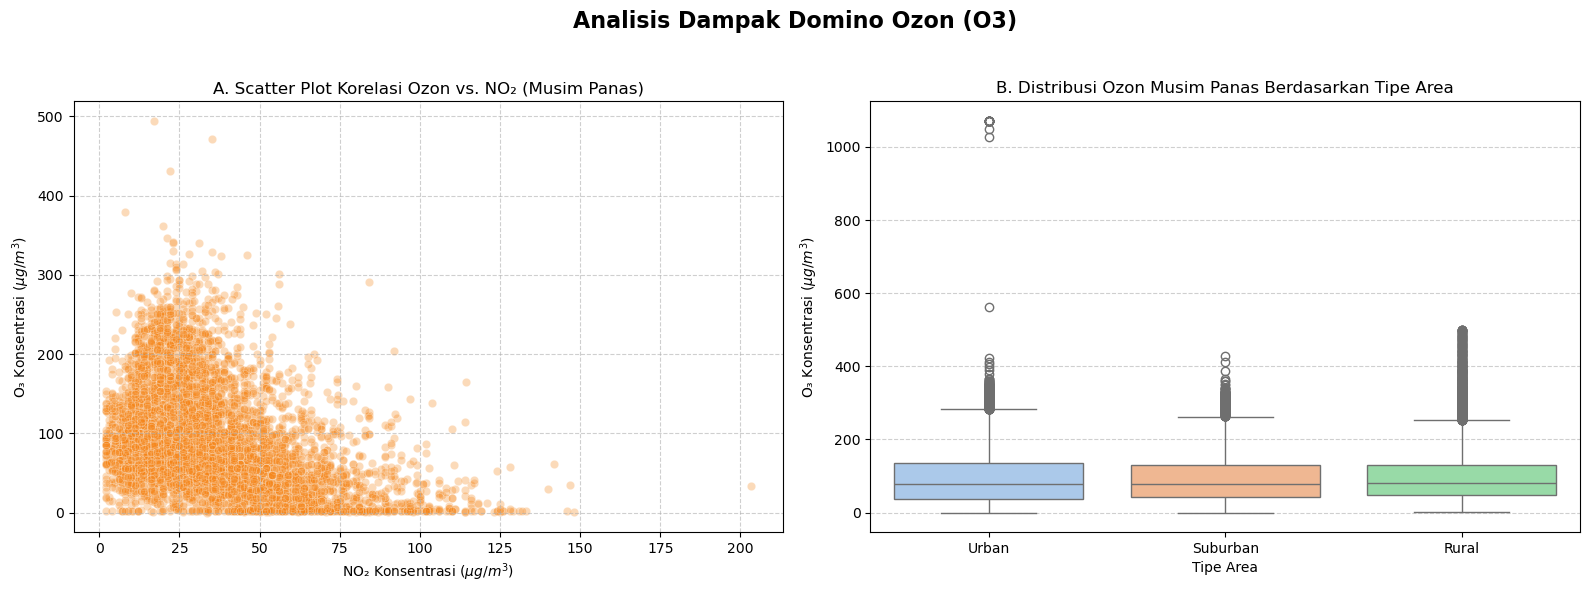

In [74]:
# Visualisasi Pertanyaan Bisnis 3
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter Plot O3 vs. NO2 (Mengamati 'Ozone Paradox')
sns.scatterplot(
    data=df_viz_pb3_scatter,
    x='NO2',
    y='O3',
    alpha=0.3,
    color='#f58518',
    ax=axes[0]
)
axes[0].set_title('A. Scatter Plot Korelasi Ozon vs. NO₂ (Musim Panas)')
axes[0].set_xlabel(r'NO₂ Konsentrasi ($\mu g/m^3$)')
axes[0].set_ylabel(r'O₃ Konsentrasi ($\mu g/m^3$)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Box Plot O3 per Area Type
sns.boxplot(
    data=df_viz_pb3_boxplot,
    x='Area_Type',
    y='O3',
    palette='pastel',
    ax=axes[1]
)
axes[1].set_title('B. Distribusi Ozon Musim Panas Berdasarkan Tipe Area')
axes[1].set_xlabel('Tipe Area')
axes[1].set_ylabel(r'O₃ Konsentrasi ($\mu g/m^3$)')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Judul utama dan penyesuaian layout
plt.suptitle('Analisis Dampak Domino Ozon (O3)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Berdasarkan visualisasi pada scatter plot, terlihat korelasi negatif antara NO2 dengan O3 yang terjadi di musim panas (Summer). Selain itu, pada box plot terlihat bahwa konsentrasi O3 lebih tinggi di area dengan polusi NO2 yang lebih rendah (rular) karena di daerah rular konsentrasi NO2 lebih rendah dibanding di area urban. Hal ini mengindikasikan terjadinya **Ozone Paradox** karena kebijakan penurunan konsentrasi NO2 yang berpengaruh terhadap penghancuran O3.

## Analisis Lanjutan (Opsional)

*Bagaimana pengaruh dinamika atmosfer (khususnya kecepatan dan arah angin) terhadap tingkat polusi PM2.5 di Beijing?*

In [75]:
# Daftar polutan yang akan dianalisis untuk PB 4
pollutants_pb4 = ['PM2.5', 'WSPM']

# Menghitung Rata-rata Polutan dan Kecepatan Angin berdasarkan Status Stagnasi
stagnation_analysis = df_full.groupby('Is_Stagnant')[pollutants_pb4].mean()

# Menghitung Rasio Polusi (Stagnan vs. Non-Stagnan)
# Rasio > 1 mengindikasikan bahwa PM2.5 lebih tinggi saat Stagnan.
ratio_pm25 = (
    stagnation_analysis.loc[True, 'PM2.5'] / stagnation_analysis.loc[False, 'PM2.5']
)

print("Rata-rata PM2.5 dan WSPM berdasarkan Kondisi Stagnasi:")
print(stagnation_analysis)
print(f"\nRasio Polusi PM2.5 (Stagnan / Non-Stagnan): {ratio_pm25:.2f}")

Rata-rata PM2.5 dan WSPM berdasarkan Kondisi Stagnasi:
                 PM2.5      WSPM
Is_Stagnant                     
False        34.522698  4.356625
True         86.043083  1.370485

Rasio Polusi PM2.5 (Stagnan / Non-Stagnan): 2.49


In [76]:
# Data Preparation untuk Wind Rose

# Memeriksa nilai unik pada kolom 'wd' (Arah Angin)
wd_unique_values = df_full['wd'].unique()

# Membuat DataFrame Khusus untuk Wind Rose
# Menghapus baris dengan NA pada kolom wd, WSPM, dan PM2.5 untuk analisis akurat
df_viz_pb4_windrose = df_full[['PM2.5', 'WSPM', 'wd']].dropna().copy()

print("\nNilai Unik Arah Angin (wd) untuk Wind Rose:")
print(wd_unique_values)
print(f"\nDataFrame Wind Rose siap dengan {len(df_viz_pb4_windrose)} baris.")


Nilai Unik Arah Angin (wd) untuk Wind Rose:
['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]

DataFrame Wind Rose siap dengan 418946 baris.


In [77]:
from windrose import WindroseAxes

# Memastikan kolom 'wd' dalam format derajat numerik (0-360).
wd_series = df_viz_pb4_windrose['wd']

if pd.api.types.is_numeric_dtype(wd_series):
    wd_deg = wd_series.astype(float)
else:
    # Mapping 16 arah kardinal ke pusat sektor derajat
    cardinal16 = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
    cardinal_to_deg = {d: i*(360/16) for i,d in enumerate(cardinal16)}
    wd_deg = wd_series.map(cardinal_to_deg)
    # Jika masih ada nilai (misal string angka), akan dikonversi ke numeric
    wd_numeric = pd.to_numeric(wd_series, errors='coerce')
    wd_deg = wd_deg.fillna(wd_numeric)

# Simpan sebagai kolom baru dan bersihkan baris yang masih mengandung NA pada kolom penting
df_viz_pb4_windrose['wd_deg'] = wd_deg
df_viz_pb4_windrose = df_viz_pb4_windrose.dropna(subset=['wd_deg', 'WSPM', 'PM2.5']).copy()

# Pastikan tipe float dan normalisasi range 0-360
df_viz_pb4_windrose['wd_deg'] = df_viz_pb4_windrose['wd_deg'].astype(float) % 360


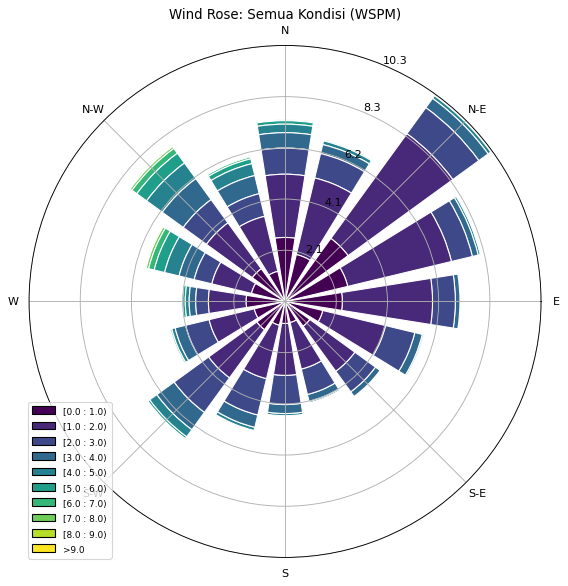

In [78]:
# Wind Rose (menggunakan wd_deg)
ax = WindroseAxes.from_ax()
ax.bar(
    df_viz_pb4_windrose['wd_deg'],        # Arah Angin (derajat)
    df_viz_pb4_windrose['WSPM'],          # Kecepatan Angin (panjang kelopak)
    normed=True,
    opening=0.8,
    edgecolor='white',
    bins=np.arange(0, 10, 1)
)
ax.set_legend()
ax.set_title('Wind Rose: Semua Kondisi (WSPM)')
plt.show()

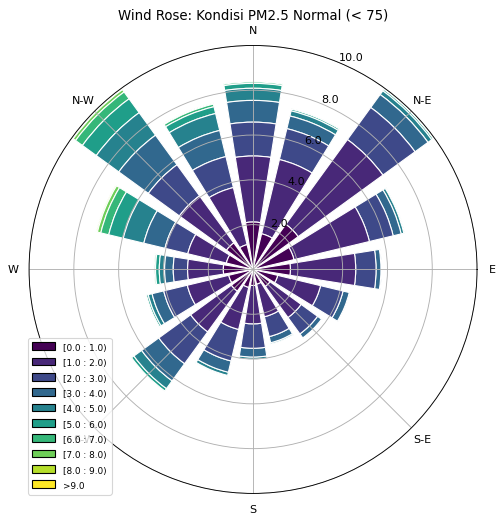

In [79]:
# Wind Rose Polusi Normal (PM2.5 < 75)
df_normal = df_viz_pb4_windrose[df_viz_pb4_windrose['PM2.5'] < 75].copy()
ax_normal = WindroseAxes.from_ax(figsize=(7, 7))
ax_normal.bar(df_normal['wd_deg'], df_normal['WSPM'], normed=True, opening=0.8, edgecolor='white', bins=np.arange(0, 10, 1))
ax_normal.set_legend()
ax_normal.set_title('Wind Rose: Kondisi PM2.5 Normal (< 75)')
plt.show()

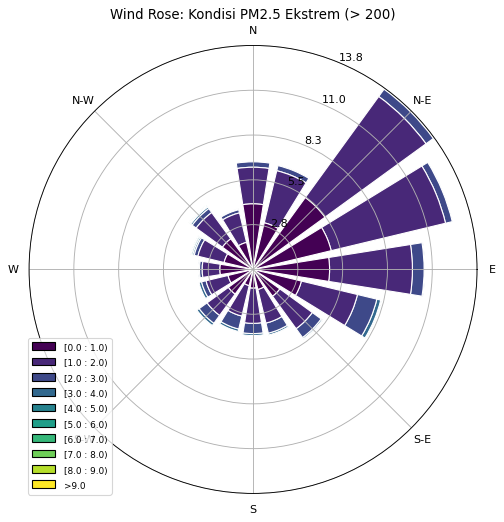

In [80]:
# Wind Rose Polusi Ekstrem (PM2.5 > 200)
df_extreme = df_viz_pb4_windrose[df_viz_pb4_windrose['PM2.5'] > 200].copy()
ax_extreme = WindroseAxes.from_ax(figsize=(7, 7))
ax_extreme.bar(df_extreme['wd_deg'], df_extreme['WSPM'], normed=True, opening=0.8, edgecolor='white', bins=np.arange(0, 10, 1))
ax_extreme.set_legend()
ax_extreme.set_title('Wind Rose: Kondisi PM2.5 Ekstrem (> 200)')
plt.show()

Konsentrasi PM2.5 saat kondisi stagnansi (WSPM < 3.2 m/s) lebih tinggi dibandingkan dengn kondisi non-stagnan. Hal ini menunjukkan bahwa kecepatan angin yang sangat rendah menjadikan akumulasi polutan menjadi lebih parah. Hal ini didukung dengan hasil Wind Rose Analysis yang menunjukkan hari polusi ekstrem (PM2.5 > 200) cenderung menunjukkan konsentrasi tertinggi pada saat kecepatan angin terendah (0.0-2.0) di semua arah.

Wind rose juga memperlihatkan bahwa polusi tertinggi terjadi ketika ada sedikit angin yang datang dari sektor Timur-Laut (N-E).

## Conclusion

- Conclution pertanyaan 1:
    - Semua polutan utama mengalami penurunan pada rentang tahun 2014 ke 2016.
    - Lonjakan ekstrem di tahun 2017 harus ditinjau ulang, mengingat keterbatasan data yang digunakan di tahun tersebut.
- Conclution pertanyaan 2:
    - CAAP efektif dalam menekan emisi dari sektor pembakaran batu bara (SO2), menunjukkan penurunan dramatis sebesar 44.7% pada tahun 2016.
    - Analisis per tahun membuktikan bahwa CAAP telah berhasil menekan PM2.5 dan NO2 secara konsisten dari 2014 hingga mencapai titik terbersih di 2016.
- Conclution pertanyaan 3:
    - Korelasi O3 dan NO2 yang konsisten negatif (dibuktikan secara visual oleh garis regresi yang menurun) menunjukkan bahwa atmosfer Beijing berada dalam rezim VOC-limited.
    - Temuan ini diperkuat oleh fakta bahwa konsentrasi median O3 tertinggi ditemukan di area Rular, sementara itu O3 tertekan di area Urban (mekanisme penghancuran O3 oleh NO2).
- Conclution pertanyaan 4:
    - Stagnasi udara adalah penyebab akumulasi polutan lokal. PM2.5 memiliki konsentrasi lebih tinggi saat kondisi stagnasi (WSPM < 3.2 m/s). Wind rose membuktikan bahwa jam-jam terburuk terjadi saat kecepatan angin (0.0-2.0 m/s).
    - Wind rose menunjukkan bahwa polusi tertinggi terjadi ketika angin datang dari sektor Timur Laut (N-E). Hal ini menunjukkan masalah regional yang dibawa masuk melalui jalur transportasi polutan dari wilayah industri di sekitarnya.

In [ ]:
# -------------------------------------------------------------------------
# MENYIAPKAN KOLOM KRUSIAL UNTUK AGREGASI
# -------------------------------------------------------------------------
if 'year' not in df_full.columns:
    df_full['year'] = df_full.index.year 

required_cols = [
    'PM2.5', 'NO2', 'SO2', 'O3', 
    'WSPM', 'wd', 'Area_Type', 'Season',
    'Pre_CAAP', 'year' # Kolom Kunci untuk Agregasi di Streamlit
]
df_dashboard = df_full[required_cols].copy()

# -------------------------------------------------------------------------
# PENYIMPANAN SATU FILE CSV
# -------------------------------------------------------------------------

# index=True untuk menyimpan index (Datetime) sebagai kolom pertama
df_dashboard.to_csv('./dashboard/main_data.csv', index=True, index_label='datetime') 
print("main_data.csv berhasil disimpan.")

df_full.drop(columns=['year'], errors='ignore', inplace=True)

main_data.csv berhasil disimpan.
